# 04. Linear Regression | الانحدار الخطي

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Example 1: Data Loading and Exploration** - Know your data
- ✅ **Example 2: Data Cleaning** - Have clean data
- ✅ **Example 3: Data Preprocessing** - Have preprocessed data ready
- ✅ **Basic math**: Understanding of lines, slopes, equations

**If you haven't completed these**, you might struggle with:
- Understanding why we need regression
- Knowing how to evaluate model performance
- Understanding the difference between simple and multiple regression

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the FOURTH example** - it's your first machine learning model!

**Why this example FOURTH?**
- **Before** you can build ML models, you need clean, preprocessed data
- **Before** you can predict, you need to understand the simplest model first
- **Before** you can use complex models, you need to master the basics

**Builds on**: 
- 📓 Example 1: Data Loading (we know our data)
- 📓 Example 2: Data Cleaning (we have clean data)
- 📓 Example 3: Data Preprocessing (we have ML-ready data)

**Leads to**: 
- 📓 Example 5: Polynomial Regression (extends linear regression)
- 📓 Unit 2: Advanced Regression (Ridge, Lasso)
- 📓 All ML models (linear regression is the foundation!)

**Why this order?**
1. Linear regression is the **simplest ML model** (easy to understand)
2. Linear regression teaches you **model evaluation** (essential for all ML)
3. Linear regression shows you **the ML workflow** (fit, predict, evaluate)

**📚 Related Content:**
- **Course 02, Notebook 5**: For an introduction to ML concepts and how linear regression fits into the broader AI landscape, see `Course 02/NOTEBOOKS/05_AI_Learning_Models.ipynb`
- **Why both exist**: Course 02 introduces ML concepts at a high level. This Course 04 example provides **detailed, hands-on implementation** with full ML pipeline (data processing, evaluation, visualization).
- **📖 Course Navigation**: For a complete guide to navigating between courses and understanding duplications, see `COURSE_MAP.md` in the root directory.

---

## The Story: Finding the Best Line | القصة: إيجاد أفضل خط

Imagine you're trying to predict house prices. **Before** using linear regression, you guess randomly or use simple averages. **After** learning linear regression, you find the best line that predicts price based on size - much more accurate!

Same with machine learning: **Before** building models, we have data but no predictions. **After** linear regression, we can predict continuous values (like prices) from features (like size)!

---

## Why Linear Regression Matters | لماذا يهم الانحدار الخطي؟

Linear regression is the foundation of machine learning:
- **Simplest ML Model**: Easy to understand and interpret
- **Fast and Efficient**: Works quickly even on large datasets
- **Interpretable**: You can see exactly how features affect predictions
- **Foundation**: Many advanced models build on linear regression concepts
- **Real-World Use**: Used in finance, healthcare, marketing, and more

## Learning Objectives | أهداف التعلم
1. Build simple linear regression (one feature)
2. Build multiple linear regression (multiple features)
3. Evaluate models using MSE, MAE, and R²
4. Visualize regression results and residuals
5. Understand feature importance from coefficients
6. Know when linear regression is appropriate

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build and evaluate linear regression models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # The regression model!
from sklearn.metrics import (
    mean_squared_error,    # MSE - measures average squared error
    mean_absolute_error,   # MAE - measures average absolute error
    r2_score              # R² - measures how well model fits (0-1, higher is better)
)

print("✅ Libraries imported successfully!")
print("\n📚 What each tool does:")
print("   - LinearRegression: Builds the regression model")
print("   - train_test_split: Splits data for training and testing")
print("   - MSE/MAE/R²: Metrics to evaluate model performance")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


✅ Libraries imported successfully!

📚 What each tool does:
   - LinearRegression: Builds the regression model
   - train_test_split: Splits data for training and testing
   - MSE/MAE/R²: Metrics to evaluate model performance


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We have clean, preprocessed data, but we can't make predictions yet.

**AFTER**: We'll build our first ML model - linear regression - to predict continuous values (like prices) from features (like size)!

**Why this matters**: Linear regression is the foundation of ML. Master this, and you understand how all ML models work!

In [2]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("=" * 60)
print("Example 4: Linear Regression")
print("مثال 4: الانحدار الخطي")
print("=" * 60)

Example 4: Linear Regression
مثال 4: الانحدار الخطي


## Step 1: Simple Linear Regression | الخطوة 1: الانحدار الخطي البسيط

**BEFORE**: We have one feature (house size) and want to predict price, but we don't know the relationship.

**AFTER**: We'll find the best line (y = mx + b) that predicts price from size!

**Why start with simple regression?**
- **One feature**: Easy to understand and visualize
- **Linear relationship**: Price = slope × size + intercept
- **Foundation**: Once you understand this, multiple regression is easy
- **Interpretable**: You can see exactly how size affects price


In [3]:
print("\n" + "=" * 60)
print("1. Simple Linear Regression (One Feature)")
print("الانحدار الخطي البسيط (ميزة واحدة)")
print("=" * 60)


1. Simple Linear Regression (One Feature)
الانحدار الخطي البسيط (ميزة واحدة)


### Why Split Data into Train and Test? | لماذا نقسم البيانات إلى تدريب واختبار؟

**BEFORE**: We have all our data (features X and target y), but we can't use all of it for training!

**AFTER**: We'll split data into training set (80%) and test set (20%) to properly evaluate our model!

**Why split data?**

**The Problem**: If we train AND test on the same data, the model will "memorize" the data instead of learning patterns!
- **Example**: Like a student who memorizes answers to specific questions
- **Result**: Model gets perfect scores on training data, but fails on new data
- **This is called "Overfitting"** - model memorizes instead of learning

**The Solution**: Split data into TWO separate sets:
1. **Training Set (X_train, y_train)** - 80% of data
   - **Purpose**: Model LEARNS from this data
   - **What happens**: Model sees features (X_train) and correct answers (y_train)
   - **Process**: Model finds the best line that fits this data
   - **Like**: Student studying from a textbook

2. **Test Set (X_test, y_test)** - 20% of data
   - **Purpose**: Model is EVALUATED on this data
   - **What happens**: Model sees features (X_test) but NOT answers (y_test)
   - **Process**: Model makes predictions, we compare with actual answers
   - **Like**: Student taking an exam (unseen questions)

**Why this works:**
- Model learns patterns from training data (not memorizing)
- Test data is "unseen" - model hasn't seen it during training
- If model performs well on test data → model learned general patterns!
- If model performs poorly on test data → model overfitted (memorized training data)

**What are X_train, X_test, y_train, y_test?**
- **X_train**: Training features (inputs) - what model learns from
- **y_train**: Training targets (outputs) - correct answers for training
- **X_test**: Test features (inputs) - what model predicts on
- **y_test**: Test targets (outputs) - correct answers for evaluation

**Common Student Questions:**

- **Q: Why 80/20 split?**
  - Answer: Good balance - need enough training data (80%) to learn, enough test data (20%) to evaluate
  - Can adjust: Small datasets (<1000) → 70/30, Large datasets (>10k) → 90/10

- **Q: Can I use test data for training?**
  - Answer: NO! Never use test data for training - this defeats the purpose!
  - Problem: If model sees test data during training, it's not a fair test
  - Rule: Test data should be "locked away" until final evaluation

- **Q: What if I need more training data?**
  - Answer: Use cross-validation (Unit 2) - splits data multiple ways without wasting test set

- **Q: Why split X and y separately?**
  - Answer: X (features) and y (target) must stay together!
  - Each row in X_train corresponds to same row in y_train
  - train_test_split keeps them aligned automatically


In [4]:
# Generate sample data for simple linear regression
# We'll create data where price depends on size: price = 50 × size + 100000 + noise
# Why add noise? Real data is never perfectly linear - there's always randomness!

np.random.seed(42)  # For reproducibility
house_size = np.linspace(1000, 4000, 100)  # House sizes from 1000 to 4000 sq ft
# True relationship: Price = 50 × size + 100000
# We add noise to simulate real-world data
house_price = 50 * house_size + 100000 + np.random.normal(0, 30000, 100)

# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

df_simple = pd.DataFrame({
    'size': house_size,
    'price': house_price
})

print("\n📊 Sample Data:")
print(df_simple.head())
print(f"\n📐 Data Shape: {df_simple.shape}")
print("\n🔍 Notice:")
print("   - As size increases, price generally increases (linear relationship)")
print("   - But there's noise (random variation) - like in real data!")


📊 Sample Data:
          size          price
0  1000.000000  164901.424590
1  1030.303030  147367.222480
2  1060.606061  172460.959173
3  1090.909091  200236.350238
4  1121.212121  149036.004819

📐 Data Shape: (100, 2)

🔍 Notice:
   - As size increases, price generally increases (linear relationship)
   - But there's noise (random variation) - like in real data!


In [5]:
# Prepare features (X) and target (y)
# X = features (what we use to predict) - in this case, just house size
# y = target (what we want to predict) - house price
X = df_simple[['size']]
y = df_simple['price']
print(f"   Features (X) shape: {X.shape}")
print(f"   Target (y) shape: {y.shape}")

   Features (X) shape: (100, 1)
   Target (y) shape: (100,)


In [6]:
# Split data into training and testing sets
# Why split? We train on training data, then evaluate on unseen test data
# This tells us if our model will work on new data (generalization)
# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")

   Training set: 80 samples
   Test set: 20 samples


In [7]:
# Create and train the linear regression model
# LinearRegression() creates an empty model
# .fit() trains the model - it finds the best line (slope and intercept)

# LinearRegression()
# - Creates linear regression model object
# - Linear regression: Finds best line (y = mx + b) to fit data
#   - m = slope (coefficient)
#   - b = intercept (bias)
# - Model is empty until .fit() is called
model_simple = LinearRegression()

# model_simple.fit(X_train, y_train)
# - .fit(): Trains the model on training data
# - X_train: Training features (input variables)
# - y_train: Training targets (output variables)
# - Process:
#   1. Model learns best slope and intercept
#   2. Finds line that minimizes prediction errors
#   3. Stores learned parameters in model object
# - After fit: model.coef_ (slope) and model.intercept_ (bias) are set
# - Returns: self (model object, for method chaining)
model_simple.fit(X_train, y_train)
print("   ✅ Model trained!")
print("   The model learned the best line to predict price from size")

   ✅ Model trained!
   The model learned the best line to predict price from size


In [8]:
# Make predictions on both training and test sets
# .predict() uses the learned line to predict prices for new sizes
# Why predict on both? Compare training vs test performance to check for overfitting
y_train_pred = model_simple.predict(X_train)
y_test_pred = model_simple.predict(X_test)
print("   ✅ Predictions made!")
print(f"   Training predictions: {len(y_train_pred)}")
print(f"   Test predictions: {len(y_test_pred)}")

   ✅ Predictions made!
   Training predictions: 80
   Test predictions: 20


In [9]:
# Model parameters - the learned line equation
# Intercept (bias): The base price when size = 0 (not realistic, but part of the line)
# Coefficient (slope): How much price increases per unit of size
print("\n📊 Model Parameters (The Learned Line):")
print("معاملات النموذج (الخط المتعلم):")
# model_simple.intercept_
# - intercept_: The y-intercept (bias term) of the regression line
#   - Value when X = 0 (base price in this case)
#   - Part of equation: y = coef_ * X + intercept_
# - Access as attribute (not method, no parentheses)
print(f"   Intercept (bias): ${model_simple.intercept_:,.2f}")

# model_simple.coef_[0]
# - coef_: Array of coefficients (slopes) for each feature
#   - For simple regression: one coefficient (slope)
#   - For multiple regression: one coefficient per feature
# - [0]: Gets first coefficient (for simple regression, there's only one)
# - Interpretation: How much y changes when X increases by 1 unit
# - Access as attribute (not method)
print(f"   Coefficient (slope): ${model_simple.coef_[0]:.4f} per sq ft")
print(f"\n   Equation: Price = {model_simple.coef_[0]:.2f} × Size + {model_simple.intercept_:,.2f}")
print(f"   Interpretation: For every 1 sq ft increase, price increases by ${model_simple.coef_[0]:.2f}")


📊 Model Parameters (The Learned Line):
معاملات النموذج (الخط المتعلم):
   Intercept (bias): $93,385.15
   Coefficient (slope): $51.2084 per sq ft

   Equation: Price = 51.21 × Size + 93,385.15
   Interpretation: For every 1 sq ft increase, price increases by $51.21


In [10]:
# Evaluate model performance using multiple metrics
# Why multiple metrics? Each tells us something different:
# - MSE: Penalizes large errors more (squared)
# - MAE: Average error in dollars (easier to interpret)
# - R²: How well model fits (0-1, 1 = perfect, 0 = no better than average)

# Common Student Questions:
# Q: Why use multiple metrics? Isn't one enough?
#    Answer: Each metric tells a different story:
#    - MSE: Shows if model has large errors (squared = big errors punished more)
#    - MAE: Shows average error in real units (easier to understand: "$20,000 average error")
#    - R²: Shows overall fit quality (0.8 = model explains 80% of variation)
#    Using all three gives complete picture!
# Q: Which metric is most important?
#    Answer: Depends on your goal:
#    - Care about large errors? → Focus on MSE
#    - Want easy interpretation? → Focus on MAE
#    - Want overall quality? → Focus on R²
#    Best practice: Report all three!

# mean_squared_error(y_true, y_pred)
# - Measures Mean Squared Error (MSE) - average squared error
# - Formula: average of (actual - predicted)²
# - Penalizes large errors more (squared term)
# - Lower is better (0 = perfect predictions)
# - Units: squared units of target (e.g., $² for prices)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# mean_absolute_error(y_true, y_pred)
# - Calculates Mean Absolute Error (MAE)
# - Formula: average of |actual - predicted|
# - Easier to interpret than MSE (same units as target)
# - Less sensitive to outliers than MSE
# - Lower is better (0 = perfect predictions)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# r2_score(y_true, y_pred)
# - Calculates R² (R-squared) score
# - Measures how well model fits data
# - Range: -∞ to 1 (1 = perfect, 0 = no better than average, negative = worse)
# - Formula: 1 - (sum of squared errors) / (sum of squared deviations from mean)
# - Higher is better
# - Interpretation: % of variance explained by model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n📊 Training Metrics (How well model learned):")
print("مقاييس التدريب:")
print(f"   MSE: ${train_mse:,.2f} (lower is better)")
print(f"   MAE: ${train_mae:,.2f} (average error in dollars)")
print(f"   R² Score: {train_r2:.4f} (closer to 1 is better)")

print("\n📊 Test Metrics (How well model generalizes):")
print("مقاييس الاختبار:")
print(f"   MSE: ${test_mse:,.2f} (lower is better)")
print(f"   MAE: ${test_mae:,.2f} (average error in dollars)")
print(f"   R² Score: {test_r2:.4f} (closer to 1 is better)")

# Check for overfitting
if test_r2 > train_r2 * 0.95:
    print("\n   ✅ Good! Test R² is close to training R² - model generalizes well!")
else:
    print("\n   ⚠️  Warning: Test R² is much lower - possible overfitting!")


📊 Training Metrics (How well model learned):
مقاييس التدريب:
   MSE: $777,122,374.55 (lower is better)
   MAE: $22,323.54 (average error in dollars)
   R² Score: 0.7209 (closer to 1 is better)

📊 Test Metrics (How well model generalizes):
مقاييس الاختبار:
   MSE: $559,838,018.06 (lower is better)
   MAE: $18,039.37 (average error in dollars)
   R² Score: 0.7837 (closer to 1 is better)

   ✅ Good! Test R² is close to training R² - model generalizes well!


### Visualizing Simple Linear Regression | تصور الانحدار الخطي البسيط

**BEFORE**: We've built the model and made predictions, but we need to see how well it fits the data!

**AFTER**: We'll create plots showing the actual data points and the regression line!

**What you'll see in the plots:**
- **Points (scatter)**: The actual data points (real house sizes and prices)
  - Blue points = Training data (what the model learned from)
  - Green points = Test data (what the model predicts on)
- **Red Line**: The regression line (model's predictions)
  - Shows how the model predicts price from size
  - If points are close to the line = good predictions!
  - If points are far from the line = poor predictions



✓ Plot saved as 'simple_linear_regression.png'


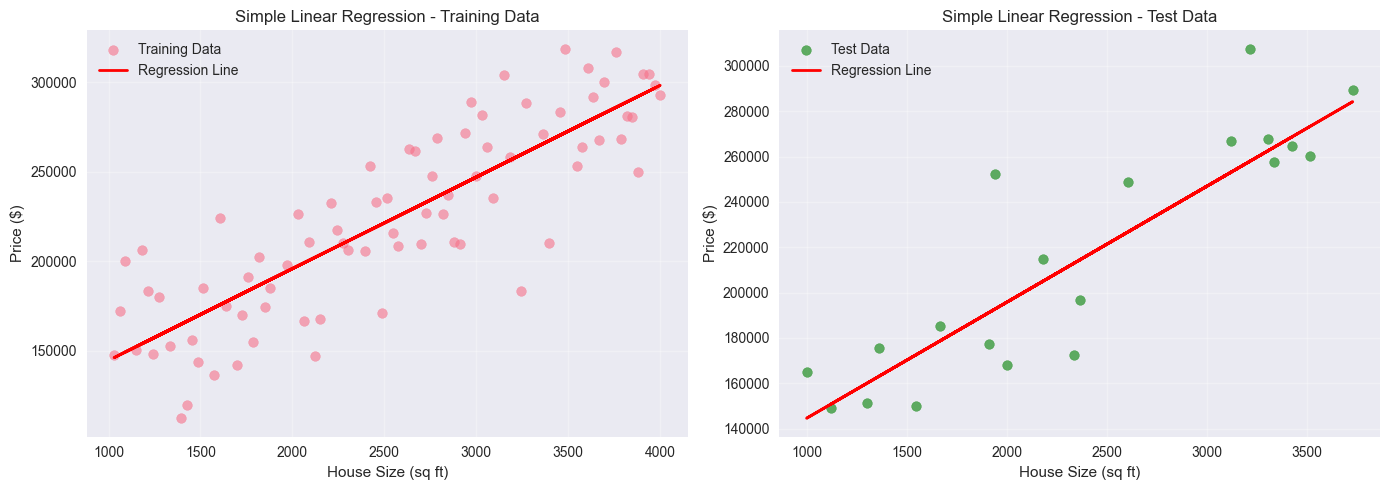

In [11]:
# Visualize
# axes[0].scatter() - Creates POINTS showing actual data
#   - X_train: House sizes (x-axis)
#   - y_train: Actual prices (y-axis)
#   - Points = Real data points (what actually happened)
#
# axes[0].plot() - Creates LINE showing model predictions
#   - X_train: House sizes (x-axis)
#   - y_train_pred: Predicted prices (y-axis)
#   - Red line = Model's predictions (what model thinks prices should be)
#   - If points are close to line = good model!

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training data
axes[0].scatter(X_train, y_train, alpha=0.6, label='Training Data')  # POINTS = actual data
axes[0].plot(X_train, y_train_pred, 'r-', linewidth=2, label='Regression Line')  # LINE = predictions
axes[0].set_xlabel('House Size (sq ft)')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Simple Linear Regression - Training Data')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test data
axes[1].scatter(X_test, y_test, alpha=0.6, label='Test Data', color='green')
axes[1].plot(X_test, y_test_pred, 'r-', linewidth=2, label='Regression Line')
axes[1].set_xlabel('House Size (sq ft)')
axes[1].set_ylabel('Price ($)')
axes[1].set_title('Simple Linear Regression - Test Data')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('simple_linear_regression.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'simple_linear_regression.png'")
plt.show()





## Step 2: Multiple Linear Regression | الخطوة 2: الانحدار الخطي المتعدد

**BEFORE**: We used one feature (size) to predict price, but real predictions use multiple features.

**AFTER**: We'll use multiple features (size, bedrooms, age, location) to predict price - more accurate!

**Why multiple regression?**
- **More features = Better predictions**: Real-world problems have many factors
- **Same concept**: Still finding a line, but in higher dimensions
- **Feature importance**: We can see which features matter most
- **Real-world use**: Most ML problems use multiple features


In [12]:
print("\n" + "=" * 60)
print("2. Multiple Linear Regression (Multiple Features)")
print("الانحدار الخطي المتعدد (ميزات متعددة)")
print("=" * 60)


2. Multiple Linear Regression (Multiple Features)
الانحدار الخطي المتعدد (ميزات متعددة)


In [13]:
# Generate sample data with multiple features
# Real house prices depend on many factors, not just size!
np.random.seed(42)
n_samples = 200
data_multiple = {
    'size': np.random.uniform(1000, 4000, n_samples),           # House size (sq ft)
    'bedrooms': np.random.randint(2, 6, n_samples),            # Number of bedrooms
    'age': np.random.uniform(0, 30, n_samples),                # House age (years)
    'location_score': np.random.uniform(1, 10, n_samples)      # Location quality (1-10)
}
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

df_multiple = pd.DataFrame(data_multiple)
print(f"   Created {n_samples} samples with {len(data_multiple)} features")

   Created 200 samples with 4 features


In [14]:
# Generate target: price based on multiple features
# True relationship: Price depends on size, bedrooms, age, and location
# Each feature has a different weight (coefficient)
# We add noise to simulate real-world data
price = (50 * df_multiple['size'] +                    # Size matters: $50 per sq ft
         30000 * df_multiple['bedrooms'] -              # Bedrooms matter: +$30k per bedroom
         5000 * df_multiple['age'] +                    # Age matters: -$5k per year (older = cheaper)
         15000 * df_multiple['location_score'] +        # Location matters: +$15k per point
         50000 +                                         # Base price
         np.random.normal(0, 40000, n_samples))          # Random noise
df_multiple['price'] = price

print("\n📊 Sample Data:")
print(df_multiple.head())
print(f"\n📐 Data Shape: {df_multiple.shape}")
print("\n🔍 Notice:")
print("   - Price depends on multiple features (not just size)")
print("   - Each feature affects price differently")
print("   - The model will learn these relationships!")


📊 Sample Data:
          size  bedrooms        age  location_score          price
0  2123.620357         5   1.550452        7.283455  381607.146732
1  3852.142919         5  15.940639        5.824867  402172.907535
2  3195.981825         4  16.219054        3.785749  271073.516617
3  2795.975453         2  19.122897        8.324155  263664.393296
4  1468.055921         5  21.782740        7.162581  312179.516671

📐 Data Shape: (200, 5)

🔍 Notice:
   - Price depends on multiple features (not just size)
   - Each feature affects price differently
   - The model will learn these relationships!


### Preparing Features (X) and Target (y) | إعداد الميزات (X) والهدف (y)

**BEFORE**: We have data with multiple columns, but we need to separate what we use to predict (features) from what we want to predict (target).

**AFTER**: We'll prepare X (features) and y (target) for the model!

**Why 4 features for X and 1 feature for y?**

- **X (Features) = Multiple inputs** that affect the price:
  - `size`: House size affects price (bigger = more expensive)
  - `bedrooms`: Number of bedrooms affects price (more bedrooms = more expensive)
  - `age`: House age affects price (newer = more expensive)
  - `location_score`: Location affects price (better location = more expensive)
  - We use **MULTIPLE features** because price depends on **MANY factors**!

- **y (Target) = Single output** we want to predict:
  - `price`: The **ONE thing** we're trying to predict
  - We predict **ONE value** (price) from **MULTIPLE inputs** (features)
  - This is the standard ML pattern: **Multiple inputs → Single output**

**Formula:**
```
price = intercept + (coef1 × size) + (coef2 × bedrooms)
 + (coef3 × age) + (coef4 × location_score)
y = b₀+ (b₁ × x₁)+ (b₂ × x₂) + (b₃ × x₃) + (b₄ × x₄)
```

**Common Student Questions:**

- **Q: What if I want to predict MORE than one target (e.g., predict both price AND days_on_market)?**
  - **Answer**: You have **TWO options**:
    1. **Build SEPARATE models** (one for each target) - **Recommended for beginners**
       - Model 1: Predict `price` from features → y₁ = price
       - Model 2: Predict `days_on_market` from features → y₂ = days_on_market
       - **Why?** Each target might depend on features differently
       - **Example**: Price might depend more on size, days_on_market might depend more on location
       - This is called "Multi-Output Regression" (separate models)
    
    2. **Use Multi-Output Regression** (one model, multiple outputs)
       - `sklearn.linear_model.LinearRegression()` can handle multiple targets
       - `y = [[price1, days1], [price2, days2], ...]` (2D array with multiple columns)
       - Model learns separate coefficients for each target
       - **Formula**: 
         ```
         price = b₀₁ + b₁₁×size + b₂₁×bedrooms + ...
         days  = b₀₂ + b₁₂×size + b₂₂×bedrooms + ...
         ```
       - **Use when**: Targets are related and you want one model
  
  - **Recommendation**: Start with **separate models** (easier to understand and interpret). Use multi-output only if targets are strongly related.


### Splitting Data for Multiple Regression | تقسيم البيانات للانحدار المتعدد

**BEFORE**: We have features (X_multiple) and target (y_multiple), but need to split them!

**AFTER**: We'll split into training and test sets - same concept as simple regression!

**Why split?**
- **Same reason as before**: Need separate training and test sets
- **Training set**: Model learns from X_train_m and y_train_m
- **Test set**: Model is evaluated on X_test_m and y_test_m
- **Purpose**: Check if model generalizes to new data (not just memorizes)

**What we get:**
- **X_train_m**: Training features (size, bedrooms, age, location_score) - 80% of data
- **y_train_m**: Training targets (price) - 80% of data
- **X_test_m**: Test features - 20% of data
- **y_test_m**: Test targets - 20% of data

**Note**: The `_m` suffix means "multiple" (multiple features), to distinguish from simple regression variables.


In [15]:
# Prepare features (X) and target (y)
# X = Features (input variables) - what we use to PREDICT
# y = Target (output variable) - what we want to PREDICT

X_multiple = df_multiple[['size', 'bedrooms', 'age', 'location_score']]  # 4 features (inputs)
y_multiple = df_multiple['price']  # 1 target (output)

# Show what we prepared
print("\n📊 Features (X) and Target (y) Prepared:")
print("الميزات (X) والهدف (y) جاهزة:")
print(f"\n   Features (X) shape: {X_multiple.shape}")
print(f"   - {X_multiple.shape[0]} samples, {X_multiple.shape[1]} features")
print(f"   - Features: {list(X_multiple.columns)}")
print(f"\n   Target (y) shape: {y_multiple.shape}")
print(f"   - {y_multiple.shape[0]} samples, 1 target")
print(f"   - Target: price")
print(f"\n   ✅ Ready for model training!")
print(f"   - Model will use {X_multiple.shape[1]} features to predict 1 target")


📊 Features (X) and Target (y) Prepared:
الميزات (X) والهدف (y) جاهزة:

   Features (X) shape: (200, 4)
   - 200 samples, 4 features
   - Features: ['size', 'bedrooms', 'age', 'location_score']

   Target (y) shape: (200,)
   - 200 samples, 1 target
   - Target: price

   ✅ Ready for model training!
   - Model will use 4 features to predict 1 target


In [16]:
# Split data
# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multiple, y_multiple, test_size=0.2, random_state=42
)

In [17]:
# Create and train model
model_multiple = LinearRegression()
model_multiple.fit(X_train_m, y_train_m)

LinearRegression()

### Visualizing Multiple Linear Regression | تصور الانحدار الخطي المتعدد

**BEFORE**: We've built a multiple regression model, but how do we visualize it with multiple features?

**AFTER**: We'll plot predicted vs actual prices to see how well the model performs!

**What you'll see in the plots:**
- **Points (scatter)**: Each point = one house
  - X-axis: Actual price (what the house actually sold for)
  - Y-axis: Predicted price (what the model predicted)
  - If points are close to the diagonal line = good predictions!
  - If points are far from the diagonal line = poor predictions
- **Red Dashed Line**: Perfect prediction line (y = x)
  - If predictions were perfect, all points would be on this line
  - Points above line = model over-predicted (predicted higher than actual)
  - Points below line = model under-predicted (predicted lower than actual)


In [18]:
# Evaluate model
train_mse_m = mean_squared_error(y_train_m, y_train_pred_m)
test_mse_m = mean_squared_error(y_test_m, y_test_pred_m)
train_r2_m = r2_score(y_train_m, y_train_pred_m)
test_r2_m = r2_score(y_test_m, y_test_pred_m)
print("\nTraining Metrics:")
print("مقاييس التدريب:")
print(f"  MSE: {train_mse_m:,.2f}")
print(f"  RMSE: {np.sqrt(train_mse_m):,.2f}")
print(f"  R² Score: {train_r2_m:.4f}")
print("\nTest Metrics:")
print("مقاييس الاختبار:")
print(f"  MSE: {test_mse_m:,.2f}")
print(f"  RMSE: {np.sqrt(test_mse_m):,.2f}")
print(f"  R² Score: {test_r2_m:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Metrics | تفسير المقاييس")
print("=" * 60)
print(f"\n📊 R² Score (R-squared):")
print(f"   - Training: {train_r2_m:.2%} | Test: {test_r2_m:.2%}")
print(f"   - Range: -∞ to 1.0 (higher is better)")
print(f"   - 1.0 = Perfect predictions (all variance explained)")
print(f"   - 0.0 = Model is as good as predicting the mean")
print(f"   - <0.0 = Model is worse than just predicting the mean")
if test_r2_m >= 0.9:
    print(f"   - ✅ EXCELLENT! (>0.9 means model explains >90% of variance)")
elif test_r2_m >= 0.7:
    print(f"   - ✅ GOOD! (>0.7 means model explains >70% of variance)")
elif test_r2_m >= 0.5:
    print(f"   - ⚠️  FAIR (>0.5 means model explains >50% of variance)")
else:
    print(f"   - ⚠️  POOR (<0.5 means model explains <50% of variance)")

print(f"\n📊 RMSE (Root Mean Squared Error):")
print(f"   - Training: ${np.sqrt(train_mse_m):,.2f} | Test: ${np.sqrt(test_mse_m):,.2f}")
print(f"   - Lower is better (measures average prediction error)")
print(f"   - In same units as target (price in dollars)")
print(f"   - Average prediction error: ${np.sqrt(test_mse_m):,.2f}")
print(f"   - This means predictions are typically off by ${np.sqrt(test_mse_m):,.0f}")

print(f"\n🔍 Comparing Train vs Test:")
if abs(train_r2_m - test_r2_m) < 0.05:
    print(f"   - ✅ Similar R² ({train_r2_m:.2%} vs {test_r2_m:.2%}) - Good generalization!")
    print(f"   - Model performs similarly on new data (not overfitting)")
else:
    print(f"   - ⚠️  Different R² ({train_r2_m:.2%} vs {test_r2_m:.2%})")
    if train_r2_m > test_r2_m:
        print(f"   - Training R² is higher - possible overfitting!")
    else:
        print(f"   - Test R² is higher - unusual but possible")

print(f"\n📚 What This Teaches Us:")
print(f"   - R² shows how much variance the model explains")
print(f"   - RMSE shows actual prediction error in dollars")
print(f"   - Compare train vs test to check for overfitting")
print(f"   - Good models have high R² and low RMSE")
print(f"   - R² > 0.7 is generally considered good for real-world problems")

NameError: name 'y_train_pred_m' is not defined

In [ ]:
# Model parameters
print("\nModel Parameters:")
print("معاملات النموذج:")
print(f"Intercept: {model_multiple.intercept_:.2f}")
print("\nCoefficients:")
print("المعاملات:")
for feature, coef in zip(X_multiple.columns, model_multiple.coef_):
    print(f"  {feature}: {coef:.4f}")

In [ ]:
# Make predictions
y_train_pred_m = model_multiple.predict(X_train_m)
y_test_pred_m = model_multiple.predict(X_test_m)

In [ ]:
# Model parameters
print("\nModel Parameters:")
print("معاملات النموذج:")
print(f"Intercept: {model_multiple.intercept_:.2f}")
print("\nCoefficients:")
print("المعاملات:")
for feature, coef in zip(X_multiple.columns, model_multiple.coef_):
    print(f"  {feature}: {coef:.4f}")

### Visualizing Multiple Linear Regression | تصور الانحدار الخطي المتعدد

**BEFORE**: We've built a multiple regression model, but how do we visualize it with multiple features?

**AFTER**: We'll plot predicted vs actual prices to see how well the model performs!

**What you'll see in the plots:**
- **Points (scatter)**: Each point = one house
  - X-axis: Actual price (what the house actually sold for)
  - Y-axis: Predicted price (what the model predicted)
  - If points are close to the diagonal line = good predictions!
  - If points are far from the diagonal line = poor predictions
- **Red Dashed Line**: Perfect prediction line (y = x)
  - If predictions were perfect, all points would be on this line
  - Points above line = model over-predicted (predicted higher than actual)
  - Points below line = model under-predicted (predicted lower than actual)


In [ ]:
# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training predictions
axes[0].scatter(y_train_m, y_train_pred_m, alpha=0.6)
axes[0].plot([y_train_m.min(), y_train_m.max()],
             [y_train_m.min(), y_train_m.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title(f'Training Set (R² = {train_r2_m:.4f})')
axes[0].grid(True, alpha=0.3)

# Test predictions
axes[1].scatter(y_test_m, y_test_pred_m, alpha=0.6, color='green')
axes[1].plot([y_test_m.min(), y_test_m.max()],
             [y_test_m.min(), y_test_m.max()], 'r--', linewidth=2)
axes[1].set_xlabel('Actual Price ($)')
axes[1].set_ylabel('Predicted Price ($)')
axes[1].set_title(f'Test Set (R² = {test_r2_m:.4f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('multiple_linear_regression.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'multiple_linear_regression.png'")
plt.show()





In [ ]:
# Evaluate model
train_mse_m = mean_squared_error(y_train_m, y_train_pred_m)
test_mse_m = mean_squared_error(y_test_m, y_test_pred_m)
train_r2_m = r2_score(y_train_m, y_train_pred_m)
test_r2_m = r2_score(y_test_m, y_test_pred_m)
print("\nTraining Metrics:")
print("مقاييس التدريب:")
print(f"  MSE: {train_mse_m:,.2f}")
print(f"  RMSE: {np.sqrt(train_mse_m):,.2f}")
print(f"  R² Score: {train_r2_m:.4f}")
print("\nTest Metrics:")
print("مقاييس الاختبار:")
print(f"  MSE: {test_mse_m:,.2f}")
print(f"  RMSE: {np.sqrt(test_mse_m):,.2f}")
print(f"  R² Score: {test_r2_m:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Metrics | تفسير المقاييس")
print("=" * 60)
print(f"\n📊 R² Score (R-squared):")
print(f"   - Training: {train_r2_m:.2%} | Test: {test_r2_m:.2%}")
print(f"   - Range: -∞ to 1.0 (higher is better)")
print(f"   - 1.0 = Perfect predictions (all variance explained)")
print(f"   - 0.0 = Model is as good as predicting the mean")
print(f"   - <0.0 = Model is worse than just predicting the mean")
if test_r2_m >= 0.9:
    print(f"   - ✅ EXCELLENT! (>0.9 means model explains >90% of variance)")
elif test_r2_m >= 0.7:
    print(f"   - ✅ GOOD! (>0.7 means model explains >70% of variance)")
elif test_r2_m >= 0.5:
    print(f"   - ⚠️  FAIR (>0.5 means model explains >50% of variance)")
else:
    print(f"   - ⚠️  POOR (<0.5 means model explains <50% of variance)")

print(f"\n📊 RMSE (Root Mean Squared Error):")
print(f"   - Training: ${np.sqrt(train_mse_m):,.2f} | Test: ${np.sqrt(test_mse_m):,.2f}")
print(f"   - Lower is better (measures average prediction error)")
print(f"   - In same units as target (price in dollars)")
print(f"   - Average prediction error: ${np.sqrt(test_mse_m):,.2f}")
print(f"   - This means predictions are typically off by ${np.sqrt(test_mse_m):,.0f}")

print(f"\n🔍 Comparing Train vs Test:")
if abs(train_r2_m - test_r2_m) < 0.05:
    print(f"   - ✅ Similar R² ({train_r2_m:.2%} vs {test_r2_m:.2%}) - Good generalization!")
    print(f"   - Model performs similarly on new data (not overfitting)")
else:
    print(f"   - ⚠️  Different R² ({train_r2_m:.2%} vs {test_r2_m:.2%})")
    if train_r2_m > test_r2_m:
        print(f"   - Training R² is higher - possible overfitting!")
    else:
        print(f"   - Test R² is higher - unusual but possible")

print(f"\n📚 What This Teaches Us:")
print(f"   - R² shows how much variance the model explains")
print(f"   - RMSE shows actual prediction error in dollars")
print(f"   - Compare train vs test to check for overfitting")
print(f"   - Good models have high R² and low RMSE")
print(f"   - R² > 0.7 is generally considered good for real-world problems")

### Calculating Residuals | حساب البواقي

**BEFORE**: We know what residuals are, now let's calculate them!

**AFTER**: We'll compute residuals and check their statistics to see if our model is good!

**What we'll calculate:**
- **Residuals**: `residuals = y_test - y_test_pred`
  - For each test sample: actual price - predicted price
  - Positive = model under-predicted, Negative = model over-predicted
- **Statistics**: Mean, standard deviation, min, max
  - Mean close to 0 = no bias ✅
  - Small std = consistent predictions ✅


In [ ]:
# Calculate residuals
# residuals = y_test - y_test_pred
# - For each test sample: actual price - predicted price
# - Positive residual = model under-predicted (predicted too low)
# - Negative residual = model over-predicted (predicted too high)
# - Residual close to 0 = good prediction!

residuals = y_test_m - y_test_pred_m

# Print residual statistics
print("\n" + "=" * 60)
print("4. Residuals Analysis")
print("تحليل البواقي")
print("=" * 60)
print(f"\nResidual Statistics:")
print(f"إحصائيات البواقي:")
print(f"  Mean: {residuals.mean():.2f} (should be close to 0)")
print(f"  Std: {residuals.std():.2f}")
print(f"  Min: {residuals.min():.2f}")
print(f"  Max: {residuals.max():.2f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting Residuals | تفسير البواقي")
print("=" * 60)
mean_residual = residuals.mean()
std_residual = residuals.std()

print(f"\n📊 Residual Mean: {mean_residual:.2f}")
if abs(mean_residual) < std_residual * 0.1:
    print(f"   - ✅ Mean is close to 0 (good!)")
    print(f"   - Model predictions are unbiased (no systematic over/under-prediction)")
else:
    print(f"   - ⚠️  Mean is not close to 0")
    if mean_residual > 0:
        print(f"   - Model tends to UNDER-predict (predictions are too low)")
    else:
        print(f"   - Model tends to OVER-predict (predictions are too high)")

print(f"\n📊 Residual Standard Deviation: {std_residual:.2f}")
print(f"   - Measures spread of errors")
print(f"   - Lower is better (more consistent predictions)")
print(f"   - Most errors are within ±{std_residual:.0f} (68% of predictions)")

print(f"\n🔍 What to Check in Residual Plots:")
print(f"   - Residuals should be randomly scattered (no patterns)")
print(f"   - No trends or curves (indicates non-linear relationships)")
print(f"   - Constant variance (no funnel shapes)")
print(f"   - Normally distributed (bell curve shape)")

print(f"\n📚 What This Teaches Us:")
print(f"   - Residuals show prediction errors for each sample")
print(f"   - Mean close to 0 = no bias (good!)")
print(f"   - Small std = consistent predictions (good!)")
print(f"   - Patterns in residuals = model problems (need to fix!)")


In [ ]:
# Calculate residuals
# residuals = y_test - y_test_pred
# - For each test sample: actual price - predicted price
# - Positive residual = model under-predicted (predicted too low)
# - Negative residual = model over-predicted (predicted too high)
# - Residual close to 0 = good prediction!

residuals = y_test_m - y_test_pred_m

# Print residual statistics
print("\n" + "=" * 60)
print("4. Residuals Analysis")
print("تحليل البواقي")
print("=" * 60)
print(f"\nResidual Statistics:")
print(f"إحصائيات البواقي:")
print(f"  Mean: {residuals.mean():.2f} (should be close to 0)")
print(f"  Std: {residuals.std():.2f}")
print(f"  Min: {residuals.min():.2f}")
print(f"  Max: {residuals.max():.2f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting Residuals | تفسير البواقي")
print("=" * 60)
mean_residual = residuals.mean()
std_residual = residuals.std()

print(f"\n📊 Residual Mean: {mean_residual:.2f}")
if abs(mean_residual) < std_residual * 0.1:
    print(f"   - ✅ Mean is close to 0 (good!)")
    print(f"   - Model predictions are unbiased (no systematic over/under-prediction)")
else:
    print(f"   - ⚠️  Mean is not close to 0")
    if mean_residual > 0:
        print(f"   - Model tends to UNDER-predict (predictions are too low)")
    else:
        print(f"   - Model tends to OVER-predict (predictions are too high)")

print(f"\n📊 Residual Standard Deviation: {std_residual:.2f}")
print(f"   - Measures spread of errors")
print(f"   - Lower is better (more consistent predictions)")
print(f"   - Most errors are within ±{std_residual:.0f} (68% of predictions)")

print(f"\n🔍 What to Check in Residual Plots:")
print(f"   - Residuals should be randomly scattered (no patterns)")
print(f"   - No trends or curves (indicates non-linear relationships)")
print(f"   - Constant variance (no funnel shapes)")
print(f"   - Normally distributed (bell curve shape)")

print(f"\n📚 What This Teaches Us:")
print(f"   - Residuals show prediction errors for each sample")
print(f"   - Mean close to 0 = no bias (good!)")
print(f"   - Small std = consistent predictions (good!)")
print(f"   - Patterns in residuals = model problems (need to fix!)")


In [ ]:
# Evaluate model
train_mse_m = mean_squared_error(y_train_m, y_train_pred_m)
test_mse_m = mean_squared_error(y_test_m, y_test_pred_m)
train_r2_m = r2_score(y_train_m, y_train_pred_m)
test_r2_m = r2_score(y_test_m, y_test_pred_m)
print("\nTraining Metrics:")
print("مقاييس التدريب:")
print(f"  MSE: {train_mse_m:,.2f}")
print(f"  RMSE: {np.sqrt(train_mse_m):,.2f}")
print(f"  R² Score: {train_r2_m:.4f}")
print("\nTest Metrics:")
print("مقاييس الاختبار:")
print(f"  MSE: {test_mse_m:,.2f}")
print(f"  RMSE: {np.sqrt(test_mse_m):,.2f}")
print(f"  R² Score: {test_r2_m:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Metrics | تفسير المقاييس")
print("=" * 60)
print(f"\n📊 R² Score (R-squared):")
print(f"   - Training: {train_r2_m:.2%} | Test: {test_r2_m:.2%}")
print(f"   - Range: -∞ to 1.0 (higher is better)")
print(f"   - 1.0 = Perfect predictions (all variance explained)")
print(f"   - 0.0 = Model is as good as predicting the mean")
print(f"   - <0.0 = Model is worse than just predicting the mean")
if test_r2_m >= 0.9:
    print(f"   - ✅ EXCELLENT! (>0.9 means model explains >90% of variance)")
elif test_r2_m >= 0.7:
    print(f"   - ✅ GOOD! (>0.7 means model explains >70% of variance)")
elif test_r2_m >= 0.5:
    print(f"   - ⚠️  FAIR (>0.5 means model explains >50% of variance)")
else:
    print(f"   - ⚠️  POOR (<0.5 means model explains <50% of variance)")

print(f"\n📊 RMSE (Root Mean Squared Error):")
print(f"   - Training: ${np.sqrt(train_mse_m):,.2f} | Test: ${np.sqrt(test_mse_m):,.2f}")
print(f"   - Lower is better (measures average prediction error)")
print(f"   - In same units as target (price in dollars)")
print(f"   - Average prediction error: ${np.sqrt(test_mse_m):,.2f}")
print(f"   - This means predictions are typically off by ${np.sqrt(test_mse_m):,.0f}")

print(f"\n🔍 Comparing Train vs Test:")
if abs(train_r2_m - test_r2_m) < 0.05:
    print(f"   - ✅ Similar R² ({train_r2_m:.2%} vs {test_r2_m:.2%}) - Good generalization!")
    print(f"   - Model performs similarly on new data (not overfitting)")
else:
    print(f"   - ⚠️  Different R² ({train_r2_m:.2%} vs {test_r2_m:.2%})")
    if train_r2_m > test_r2_m:
        print(f"   - Training R² is higher - possible overfitting!")
    else:
        print(f"   - Test R² is higher - unusual but possible")

print(f"\n📚 What This Teaches Us:")
print(f"   - R² shows how much variance the model explains")
print(f"   - RMSE shows actual prediction error in dollars")
print(f"   - Compare train vs test to check for overfitting")
print(f"   - Good models have high R² and low RMSE")
print(f"   - R² > 0.7 is generally considered good for real-world problems")

### Visualizing Residuals | تصور البواقي

**BEFORE**: We've calculated residual statistics, but we need to visualize them to see patterns!

**AFTER**: We'll create plots to check if residuals are randomly distributed (good) or have patterns (indicates problems)!

**Why visualize residuals?**
- **Check assumptions**: Linear regression assumes residuals are random and normally distributed
- **Detect patterns**: Patterns in residuals indicate model problems (non-linearity, heteroscedasticity)
- **Diagnose issues**: Visual inspection helps identify what's wrong with the model
- **Validate model**: Good models have randomly scattered residuals around zero


In [ ]:
# Plot residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residuals distribution
axes[0].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals Distribution')
axes[0].grid(True, alpha=0.3)

# Residuals vs Predicted
axes[1].scatter(y_test_pred_m, residuals, alpha=0.6)
axes[1].axhline(0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residuals_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'residuals_analysis.png'")
plt.show()



print("\n" + "=" * 60)
print("Example 4 Complete! ✓")
print("اكتمل المثال 4! ✓")
print("=" * 60)

## Step 6: Decision Framework - When to Use Linear Regression | الخطوة 6: إطار القرار - متى تستخدم الانحدار الخطي

**BEFORE**: You've learned how to build linear regression models, but when should you use them?

**AFTER**: You'll have a clear decision framework to determine if linear regression is the right choice for your problem!

**Why this matters**: Using linear regression when it's not appropriate leads to:
- **Poor predictions** → Model can't capture non-linear patterns
- **Wasted time** → Trying to force linear relationships that don't exist
- **Wrong conclusions** → Making decisions based on inaccurate models

---

### 🎯 Decision Framework: Is Linear Regression Appropriate? | إطار القرار: هل الانحدار الخطي مناسب؟

**Key Question**: Should I use **LINEAR REGRESSION** or a different method?

#### Decision Tree:

**Step 1: What type of problem?**
- **Classification** (predicting categories) → ❌ Use Logistic Regression or other classifiers
  - Why? Linear regression predicts continuous values, not categories
- **Regression** (predicting numbers) → Continue to Step 2

**Step 2: What is the relationship?**
- **Linear relationship** → ✅ Use Linear Regression
  - Why? Linear regression assumes linear relationships
- **Non-linear relationship** → ⚠️ Use Polynomial Regression or other methods
  - Why? Linear regression can't capture curves

**Step 3: Data characteristics?**
- **Many features (>100)** → ⚠️ Use Ridge or Lasso Regression
- **Multicollinearity present** → ⚠️ Use Ridge Regression
- **Need feature selection** → ⚠️ Use Lasso Regression
- **Slightly curved** → Try Polynomial Regression
- **Highly non-linear** → Use Random Forest, XGBoost, Neural Networks

---

### 📊 Comparison Table: Linear Regression vs Alternatives | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Linear Regression** | Linear relationships, continuous target, interpretable | • Simple & fast<br>• Interpretable<br>• No hyperparameters<br>• Works well with linear data | • Can't handle non-linear<br>• Assumes linearity<br>• Sensitive to outliers | House price vs size (linear) |
| **Polynomial Regression** | Slightly curved relationships | • Handles curves<br>• Still interpretable<br>• Extends linear regression | • Can overfit<br>• More complex | House price vs size (curved) |
| **Ridge/Lasso** | Many features, multicollinearity | • Prevents overfitting<br>• Handles many features<br>• Regularization | • More complex<br>• Hyperparameter tuning | 100+ features, correlated features |
| **Random Forest** | Non-linear, complex patterns | • Handles non-linear<br>• Feature importance<br>• Robust | • Less interpretable<br>• More complex | Complex relationships |
| **XGBoost** | Non-linear, best performance | • State-of-the-art<br>• Handles complex patterns | • Less interpretable<br>• Complex | Competition-level performance |

---

### ✅ When Linear Regression IS Appropriate | متى يكون الانحدار الخطي مناسبًا

**Use Linear Regression when:**

1. **Linear Relationship** ✅
   - Scatter plot shows a straight line pattern
   - Example: House size vs price (larger = more expensive, linear)

2. **Continuous Target Variable** ✅
   - Predicting numbers (price, temperature, sales)
   - NOT categories (sick/healthy, yes/no)

3. **Interpretability Important** ✅
   - Need to understand feature coefficients
   - Example: "Each bedroom adds $30,000 to price"

4. **Fast Predictions Needed** ✅
   - Simple model, fast training and prediction
   - Good for real-time systems

5. **Baseline Model** ✅
   - Start with linear regression as baseline
   - Compare with more complex models

6. **Small to Medium Datasets** ✅
   - Works well with limited data
   - Doesn't require huge datasets

---

### ❌ When Linear Regression IS NOT Appropriate | متى لا يكون الانحدار الخطي مناسبًا

**Don't use Linear Regression when:**

1. **Non-Linear Relationship** ❌
   - Scatter plot shows curves, exponential patterns
   - Example: Growth patterns, decay curves
   - **Use Instead**: Polynomial Regression, Random Forest, XGBoost

2. **Classification Problem** ❌
   - Predicting categories (yes/no, A/B/C)
   - **Use Instead**: Logistic Regression, Decision Trees, SVM

3. **Many Features with Multicollinearity** ❌
   - Features are highly correlated
   - **Use Instead**: Ridge Regression (handles multicollinearity)

4. **Need Feature Selection** ❌
   - Want to automatically select important features
   - **Use Instead**: Lasso Regression (automatic feature selection)

5. **Complex Non-Linear Patterns** ❌
   - Multiple interactions, complex relationships
   - **Use Instead**: Random Forest, XGBoost, Neural Networks

6. **Outliers Present** ❌
   - Many extreme values that affect the line
   - **Use Instead**: Robust regression methods, or clean outliers first

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: House Price Prediction ✅ APPROPRIATE
- **Problem**: Predict house price from size
- **Relationship**: Linear (larger houses = higher prices, roughly linear)
- **Target**: Continuous (price in dollars)
- **Decision**: ✅ Use Linear Regression
- **Reasoning**: Linear relationship, continuous target, interpretable

#### Example 2: Stock Price Prediction ⚠️ MAY NOT BE APPROPRIATE
- **Problem**: Predict stock price from time
- **Relationship**: Non-linear (volatile, trends, cycles)
- **Target**: Continuous (price)
- **Decision**: ⚠️ Try Linear first, but may need Polynomial or other methods
- **Reasoning**: Stock prices have complex patterns, linear may not capture well

#### Example 3: Customer Churn Prediction ❌ NOT APPROPRIATE
- **Problem**: Predict if customer will leave (yes/no)
- **Relationship**: Classification problem
- **Target**: Categorical (churn/not churn)
- **Decision**: ❌ Use Logistic Regression instead
- **Reasoning**: Classification problem, not regression

#### Example 4: Sales Prediction with Many Features ⚠️ MAY NEED REGULARIZATION
- **Problem**: Predict sales from 50+ features
- **Relationship**: Likely linear, but many features
- **Target**: Continuous (sales amount)
- **Decision**: ⚠️ Use Ridge or Lasso Regression
- **Reasoning**: Many features may cause overfitting, regularization helps

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Check relationship first** - Plot data to see if it's linear
2. **Classification ≠ Regression** - Use logistic regression for categories
3. **Start simple** - Linear regression is a good baseline
4. **Check assumptions** - Linearity, independence, homoscedasticity
5. **Many features?** - Consider Ridge/Lasso for regularization
6. **Non-linear?** - Try Polynomial Regression or other methods
7. **Always visualize** - Scatter plots reveal relationship type

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Predicting student test scores from study hours
- **Relationship**: More hours = higher scores (roughly linear)
- **Target**: Continuous (test score 0-100)
- **Decision**: ✅ Linear Regression appropriate

**Scenario 2**: Predicting customer satisfaction (satisfied/not satisfied)
- **Relationship**: Classification problem
- **Target**: Categorical (satisfied/not satisfied)
- **Decision**: ❌ Use Logistic Regression, not Linear Regression

**Scenario 3**: Predicting house price from 100+ features
- **Relationship**: Likely linear, but many features
- **Target**: Continuous (price)
- **Decision**: ⚠️ Use Ridge or Lasso Regression (regularization needed)

---

**Connection to Next Steps**: 
- 📓 **Example 5: Polynomial Regression** - For non-linear relationships
- 📓 **Unit 2, Example 1: Ridge/Lasso** - For many features and regularization
- 📓 **Unit 3: Classification** - For predicting categories


---

## ✅ Summary | الملخص

Great job completing this example!

### What You Learned:

**Linear Regression - Your First ML Model:**
- **Simple Linear Regression**: Predicts a continuous target using one feature. Finds the best line (y = mx + b) that minimizes prediction error.

- **Multiple Linear Regression**: Extends to multiple features. Predicts target using multiple inputs simultaneously. Formula: y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ

- **Model Evaluation Metrics**:
  - **MSE (Mean Squared Error)**: Average squared difference between predictions and actual values (lower is better)
  - **MAE (Mean Absolute Error)**: Average absolute difference (more interpretable than MSE)
  - **R² (R-squared)**: Proportion of variance explained (0 to 1, higher is better, 1 = perfect fit)

- **Residual Analysis**: Residuals (errors) should be randomly distributed around zero. Patterns in residuals indicate model problems.

- **Feature Importance**: Coefficients show how much each feature affects the prediction. Larger absolute coefficients = more important features.

### 🔗 How This Connects:

**This example builds on and leads to:**
- **Example 1-3**: Data loading, cleaning, and preprocessing prepare data for ML models
- **Example 5: Polynomial Regression** - Extends linear regression to capture non-linear relationships
- **Unit 2: Advanced Regression** - Ridge and Lasso regression improve on basic linear regression
- **Unit 3: Classification** - Similar workflow (fit, predict, evaluate) but for categorical targets
- **All ML Models**: Linear regression teaches the fundamental ML workflow used by all models

**Why this example is important:**
1. **First ML model**: Simplest model, easiest to understand
2. **ML workflow**: Teaches the standard process: prepare data → train model → evaluate → interpret
3. **Foundation**: Many advanced models build on linear regression concepts
4. **Interpretability**: Linear models are highly interpretable - you can see exactly how features affect predictions

### Key Takeaways:
1. **Linear regression finds the best line**: Minimizes prediction error using least squares method
2. **Multiple features improve predictions**: More relevant features generally lead to better models
3. **Evaluation metrics matter**: MSE, MAE, and R² tell you how good your model is
4. **Residuals reveal problems**: Check residuals to diagnose model issues
5. **Coefficients show feature importance**: Understand which features matter most

### Next Steps:
- Complete exercises in `exercises/` folder to practice building linear regression models
- Review quiz materials to test your understanding
- Proceed to **Example 5: Polynomial Regression** to handle non-linear relationships
- Then move to **Unit 2: Advanced Regression** for Ridge and Lasso techniques

---

**💡 Tips for Success:**
- **Data quality matters**: Clean, preprocessed data leads to better models
- **Feature selection**: Not all features help - remove irrelevant ones
- **Check assumptions**: Linear regression assumes linear relationships - verify this!
- **Visualize**: Always plot your data and residuals to understand what's happening